___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

In [1]:
!pip install tensorflow

In [2]:
!conda install tensorflow

^C


In [3]:
!conda install tensorflow-gpu


^C


In [4]:
try:
    import jupyter_black

    jupyter_black.load()
except ImportError:
    pass

In [5]:
import os


In [6]:
!python --version

Python 3.9.7


In [7]:
import tensorflow as tf

tf.__version__

'2.11.0'

In [8]:
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session")
else:
    print("CPU will be used for this session")

CPU will be used for this session


In [9]:
if tf.config.list_physical_devices("GPU"):
    !nvidia-smi

# Improt Libraries & Data

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
# from mlxtend.plotting import plot_confusion_matrix
from ipywidgets import interact
# Uncomment the following lines if you want to suppress warnings:
# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it to None to display all rows in the dataframe:
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe:
pd.set_option("display.max_columns", None)

In [158]:
import numpy as np
import pandas as pd
#tensorflow/keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation
#sklearn
# from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, MaxAbsScaler, PowerTransformer, QuantileTransformer, Normalizer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
# from category_encoders import BinaryEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
#model saving
import pickle

In [159]:
df= pd.read_csv("Churn_Modelling.csv")

In [160]:
df.shape

(10000, 14)

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [161]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [162]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,5000.500,15690940.569,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,2886.896,71936.186,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,1.000,15565701.000,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,2500.750,15628528.250,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,5000.500,15690738.000,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,7500.250,15753233.750,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,10000.000,15815690.000,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [164]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [165]:
df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool>

In [167]:
df.describe(include=['object'])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [168]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000,0.004,0.006,0.001,-0.006,-0.009,0.007,0.001,0.012,-0.006,-0.017
CustomerId,0.004,1.000,0.005,0.009,-0.015,-0.012,0.017,-0.014,0.002,0.015,-0.006
CreditScore,0.006,0.005,1.000,-0.004,0.001,0.006,0.012,-0.005,0.026,-0.001,-0.027
Age,0.001,0.009,-0.004,1.000,-0.010,0.028,-0.031,-0.012,0.085,-0.007,0.285
Tenure,-0.006,-0.015,0.001,-0.010,1.000,-0.012,0.013,0.023,-0.028,0.008,-0.014
Balance,-0.009,-0.012,0.006,0.028,-0.012,1.000,-0.304,-0.015,-0.010,0.013,0.119
NumOfProducts,0.007,0.017,0.012,-0.031,0.013,-0.304,1.000,0.003,0.010,0.014,-0.048
HasCrCard,0.001,-0.014,-0.005,-0.012,0.023,-0.015,0.003,1.000,-0.012,-0.010,-0.007
IsActiveMember,0.012,0.002,0.026,0.085,-0.028,-0.010,0.010,-0.012,1.000,-0.011,-0.156
EstimatedSalary,-0.006,0.015,-0.001,-0.007,0.008,0.013,0.014,-0.010,-0.011,1.000,0.012


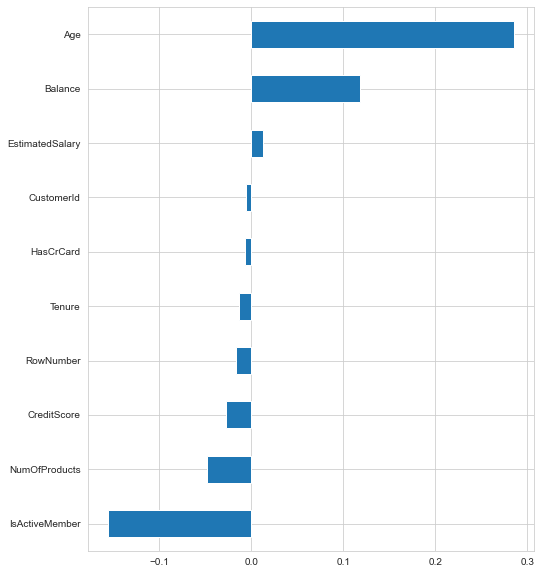

In [169]:
plt.figure(figsize=(8, 10))
(df.corr()["Exited"].sort_values().drop("Exited").plot(kind="barh"))
plt.show()

In [173]:
df.corr()["Exited"].sort_values()

IsActiveMember    -0.156
NumOfProducts     -0.048
CreditScore       -0.027
Tenure            -0.014
HasCrCard         -0.007
EstimatedSalary    0.012
Balance            0.119
Age                0.285
Exited             1.000
Name: Exited, dtype: float64

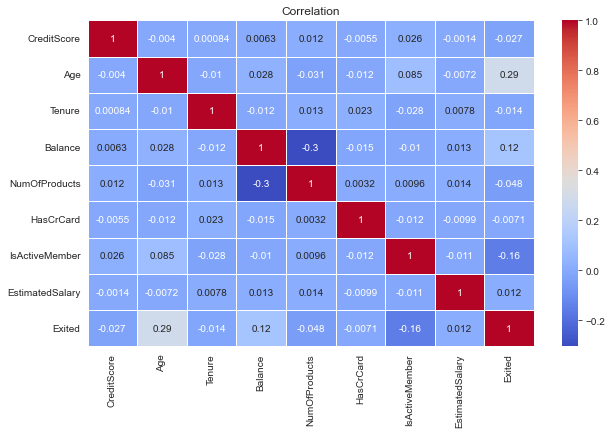

In [174]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation')
plt.show()

In [175]:
#Dummies

df[(df["Tenure"]== 1) | (df["HasCrCard"] == 0)]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
8,501,France,Male,44,4,142051.070,2,0,1,74940.500,0
10,528,France,Male,31,6,102016.720,2,0,0,80181.120,0
13,549,France,Female,25,5,0.000,2,0,0,190857.790,0
...,...,...,...,...,...,...,...,...,...,...,...
9980,741,Spain,Male,35,6,74371.490,1,0,0,99595.670,0
9983,613,France,Male,40,4,0.000,1,0,0,151325.240,0
9986,673,Germany,Male,47,1,183579.540,2,0,1,34047.540,0
9994,800,France,Female,29,2,0.000,2,0,0,167773.550,0


In [176]:
# Droping unnecessary features 
print(f"The  DataFrame BEFORE dropping unnecessary features: rows are {df.shape[0]} and columns are {df.shape[1]}")
df = df.drop(["CustomerId", "RowNumber", "Surname"], axis=1)

print(f"The  DataFrame AFTER dropping unnecessary features: rows are {df.shape[0]} and columns are {df.shape[1]}")

The  DataFrame BEFORE dropping unnecessary features: rows are 10000 and columns are 11


KeyError: "['CustomerId' 'RowNumber' 'Surname'] not found in axis"

In [177]:
df[(df["Balance"]== 0) & (df["IsActiveMember"] == 0)].value_counts().sum()

1744

In [178]:
df[(df["Balance"]> 0) & (df["IsActiveMember"] == 0)].value_counts().sum()

3105

In [179]:
df[(df["Balance"]> 0) & (df["IsActiveMember"] == 1)].value_counts().sum()

3278

In [180]:
df[(df["Balance"]> 0) & (df["Exited"] == 1)].value_counts().sum()

1537

In [181]:
df[(df["Balance"] == 0) & (df["Exited"] == 1)].value_counts().sum()

500

In [182]:
df[(df["CreditScore"] < 300) & (df["HasCrCard"] == 1)].value_counts().sum()

0

In [183]:
from ipywidgets import interact

In [185]:
def box_m(model):
    sns.boxplot(data = df, x= "Exited", y = model)

interactive_df = df.select_dtypes(include = 'number').columns[
    df.select_dtypes(include = 'number').columns != 'Exited']

interact(box_m, model=interactive_df);

interactive(children=(Dropdown(description='model', options=('CreditScore', 'Age', 'Tenure', 'Balance', 'NumOf…

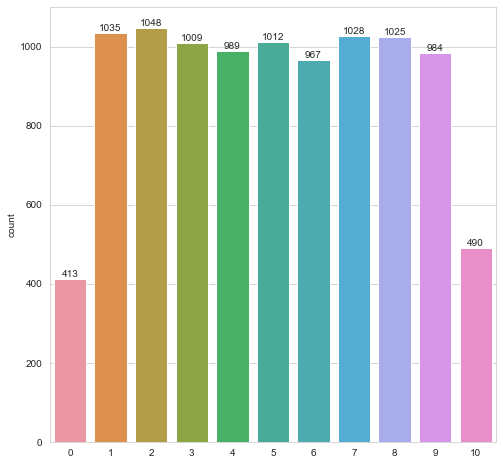

In [186]:
plt.figure(figsize=(8,8))
x = sns.countplot(x ='Tenure', data = df)
plt.title('')
plt.xlabel('')
x.bar_label(x.containers[0]);

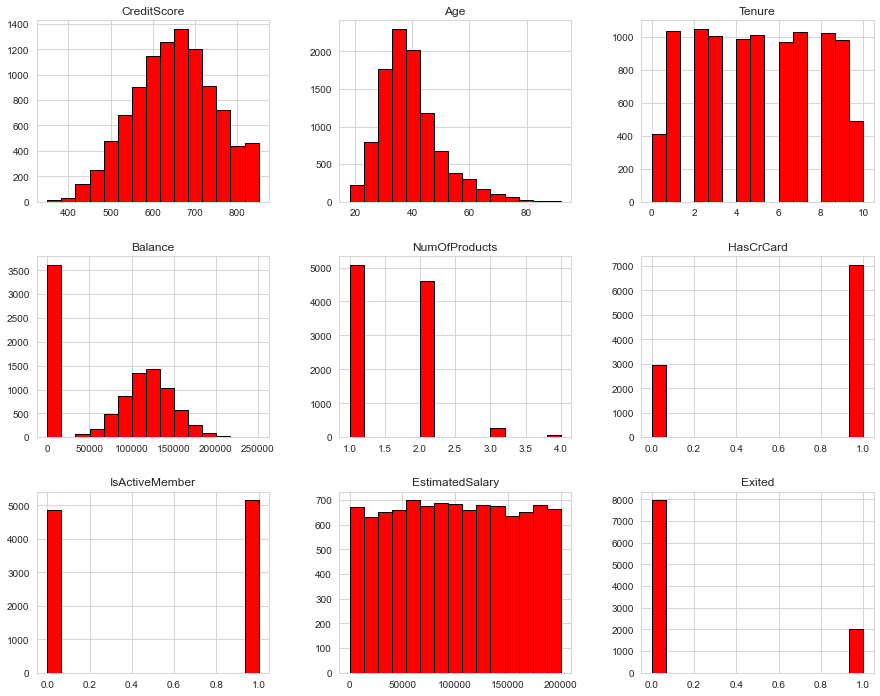

In [187]:
df.hist(figsize=(15, 12), bins=15, color='red', edgecolor='black')
# plt.title("")
plt.show()

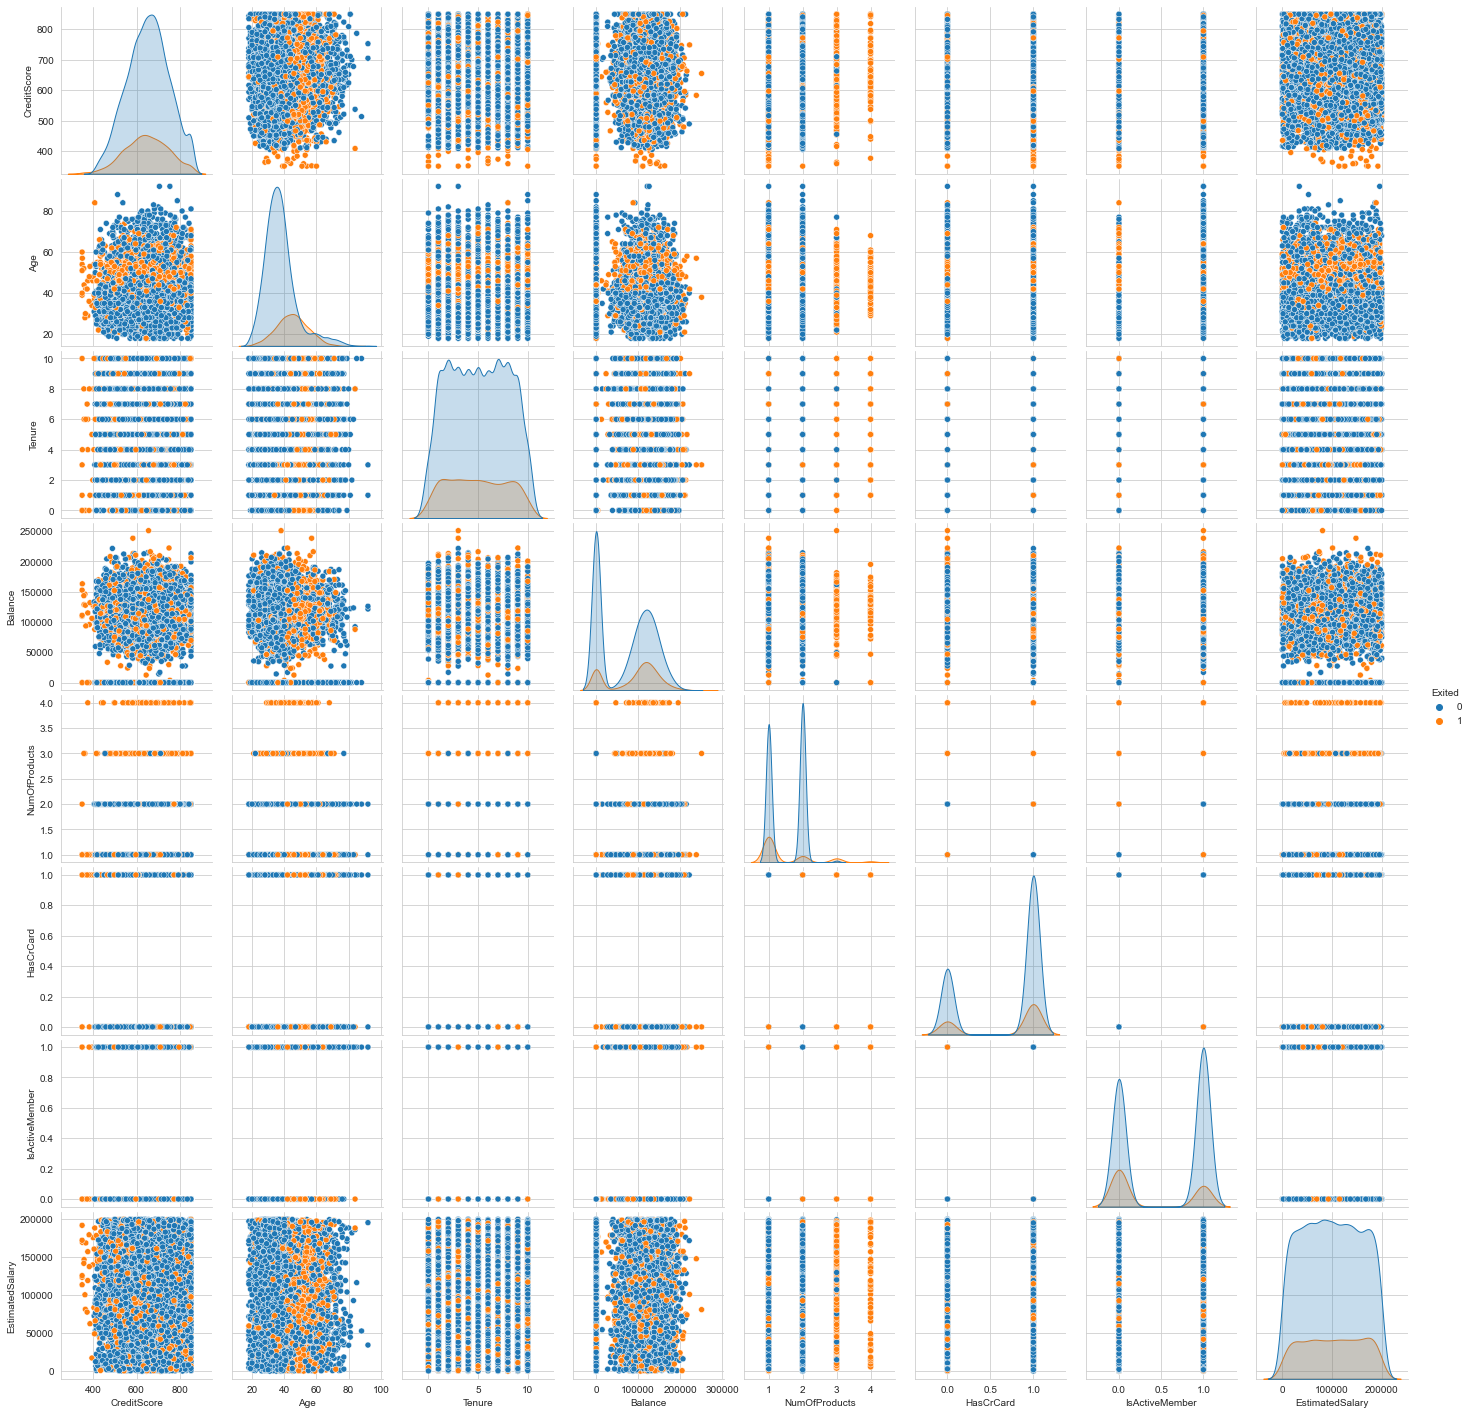

In [188]:
sns.pairplot(df, hue = 'Exited')

In [189]:

df["Gender"] = df["Gender"].map({"Female":0, "Male": 1})

In [190]:
df["Gender"]

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int64

# Scaler 

In [191]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer

In [192]:
MinMax_Scaler = MinMaxScaler()

In [193]:
cols_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [194]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder


In [195]:
column_trans = make_column_transformer((
               OneHotEncoder( handle_unknown='ignore',
                              sparse_output=False), 
                              ["Geography"]), (MinMax_Scaler, cols_scale), 
                              remainder = 'passthrough', 
                              verbose_feature_names_out=False)

In [196]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

# Preprocessing of Data
- Train | Test Split, Scalling

In [197]:
from sklearn.model_selection import train_test_split

In [198]:
X = df.drop('Exited', axis = 1)
y = df.Exited

In [199]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.20, random_state=42
)

In [200]:
X_train = column_trans.fit_transform(X_train)
X_test = column_trans.fit_transform(X_test)

In [201]:
X_train.shape

(8000, 12)

In [202]:
X_test.shape

(2000, 12)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [203]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
tf.random.set_seed(42)

In [204]:


model = Sequential()

model.add(Dense(20, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [205]:
model.fit(
    x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=1000, verbose=1
)

Epoch 1/1000
225/225 [==============================] - 2s 3ms/step - loss: 0.5249 - accuracy: 0.7947 - val_loss: 0.4656 - val_accuracy: 0.8100
Epoch 2/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4712 - accuracy: 0.7947 - val_loss: 0.4464 - val_accuracy: 0.8100
Epoch 3/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4551 - accuracy: 0.7947 - val_loss: 0.4325 - val_accuracy: 0.8100
Epoch 4/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4407 - accuracy: 0.7947 - val_loss: 0.4236 - val_accuracy: 0.8100
Epoch 5/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4322 - accuracy: 0.7947 - val_loss: 0.4127 - val_accuracy: 0.8100
Epoch 6/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4249 - accuracy: 0.8133 - val_loss: 0.4050 - val_accuracy: 0.8400
Epoch 7/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.8225 - val_loss: 0.3985 - val_accuracy:

In [206]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 20)                260       
                                                                 
 dense_17 (Dense)            (None, 16)                336       
                                                                 
 dense_18 (Dense)            (None, 4)                 68        
                                                                 
 dense_19 (Dense)            (None, 1)                 5         
                                                                 
Total params: 669
Trainable params: 669
Non-trainable params: 0
_________________________________________________________________


In [207]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.525,0.795,0.466,0.810
1,0.471,0.795,0.446,0.810
2,0.455,0.795,0.432,0.810
3,0.441,0.795,0.424,0.810
4,0.432,0.795,0.413,0.810


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

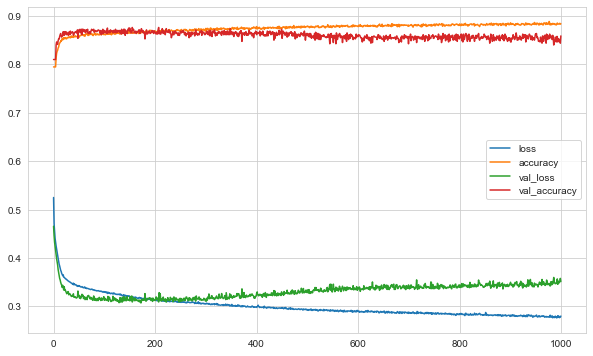

In [208]:
loss_df.plot()
plt.show()

In [209]:
Arwa_variable = model.evaluate(X_test, y_test, verbose=0)

In [210]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3825780749320984
accuracy:  0.8519999980926514


In [211]:
y_train_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

250/250 [==============================] - 0s 2ms/step
[[6174  196]
 [ 753  877]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6370
           1       0.82      0.54      0.65      1630

    accuracy                           0.88      8000
   macro avg       0.85      0.75      0.79      8000
weighted avg       0.88      0.88      0.87      8000



In [212]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1491  102]
 [ 194  213]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1593
           1       0.68      0.52      0.59       407

    accuracy                           0.85      2000
   macro avg       0.78      0.73      0.75      2000
weighted avg       0.84      0.85      0.84      2000



In [213]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.7296556957573906

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [214]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}

In [215]:
class_weights

{0: 0.6279434850863422, 1: 2.4539877300613497}

In [216]:
model = Sequential()

model.add(Dense(20, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [217]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, class_weight=class_weights)

Epoch 1/1000
225/225 [==============================] - 2s 3ms/step - loss: 0.6620 - recall: 0.5995 - val_loss: 0.6579 - val_recall: 0.6579
Epoch 2/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.6201 - recall: 0.6522 - val_loss: 0.5957 - val_recall: 0.6842
Epoch 3/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.5949 - recall: 0.6806 - val_loss: 0.5766 - val_recall: 0.7039
Epoch 4/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.5709 - recall: 0.7070 - val_loss: 0.4752 - val_recall: 0.5000
Epoch 5/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.5498 - recall: 0.7240 - val_loss: 0.5054 - val_recall: 0.6776
Epoch 6/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.5298 - recall: 0.7483 - val_loss: 0.5009 - val_recall: 0.7566
Epoch 7/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.5115 - recall: 0.7558 - val_loss: 0.4745 - val_recall: 0.7434
Epoch 8/1000
225/225

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [218]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.662,0.599,0.658,0.658
1,0.620,0.652,0.596,0.684
2,0.595,0.681,0.577,0.704
3,0.571,0.707,0.475,0.500
4,0.550,0.724,0.505,0.678


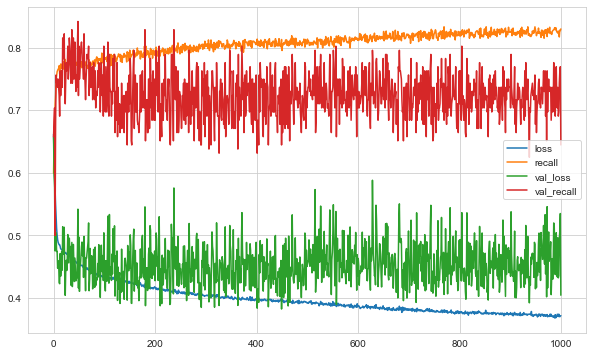

In [219]:
loss_df.plot()
plt.show()

In [220]:
Arwa_variable2 = model.evaluate(X_test, y_test, verbose=0)

In [221]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.4994184672832489
accuracy:  0.6535626649856567


In [222]:
y_train_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

250/250 [==============================] - 0s 1ms/step
[[5614  756]
 [ 391 1239]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      6370
           1       0.62      0.76      0.68      1630

    accuracy                           0.86      8000
   macro avg       0.78      0.82      0.80      8000
weighted avg       0.87      0.86      0.86      8000



In [223]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1304  289]
 [ 141  266]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1593
           1       0.48      0.65      0.55       407

    accuracy                           0.79      2000
   macro avg       0.69      0.74      0.71      2000
weighted avg       0.82      0.79      0.80      2000



In [224]:
roc_auc_score(y_test, y_pred)

0.7360719733601089

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [225]:
from tensorflow.keras.optimizers import Adam
model = Sequential()

model.add(Dense(20, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [226]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, class_weight=class_weights)

Epoch 1/1000
225/225 [==============================] - 2s 3ms/step - loss: 0.6532 - recall: 0.6387 - val_loss: 0.5252 - val_recall: 0.6053
Epoch 2/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.6035 - recall: 0.7077 - val_loss: 0.5622 - val_recall: 0.7434
Epoch 3/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.5493 - recall: 0.7490 - val_loss: 0.4889 - val_recall: 0.7500
Epoch 4/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.5364 - recall: 0.7429 - val_loss: 0.4322 - val_recall: 0.6053
Epoch 5/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.5148 - recall: 0.7415 - val_loss: 0.4728 - val_recall: 0.7171
Epoch 6/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.5078 - recall: 0.7551 - val_loss: 0.5402 - val_recall: 0.8355
Epoch 7/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4932 - recall: 0.7517 - val_loss: 0.4680 - val_recall: 0.7763
Epoch 8/1000
225/225

In [227]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.653,0.639,0.525,0.605
1,0.603,0.708,0.562,0.743
2,0.549,0.749,0.489,0.750
3,0.536,0.743,0.432,0.605
4,0.515,0.742,0.473,0.717


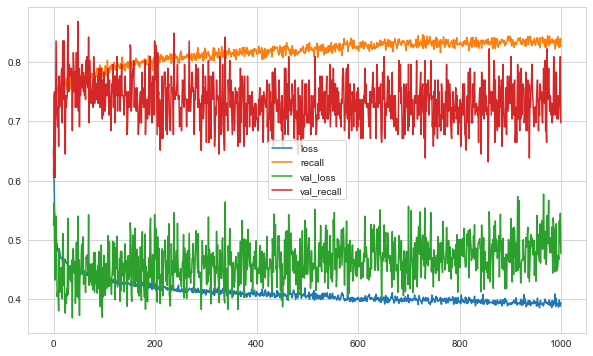

In [228]:
loss_df.plot()
plt.show()

In [229]:
Arwa_variable3 = model.evaluate(X_test, y_test, verbose=0)

In [230]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.6016713976860046
accuracy:  0.7444717288017273


In [231]:
y_train_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

250/250 [==============================] - 0s 1ms/step
[[5349 1021]
 [ 319 1311]]
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      6370
           1       0.56      0.80      0.66      1630

    accuracy                           0.83      8000
   macro avg       0.75      0.82      0.78      8000
weighted avg       0.87      0.83      0.84      8000



In [232]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1248  345]
 [ 104  303]]
              precision    recall  f1-score   support

           0       0.92      0.78      0.85      1593
           1       0.47      0.74      0.57       407

    accuracy                           0.78      2000
   macro avg       0.70      0.76      0.71      2000
weighted avg       0.83      0.78      0.79      2000



In [233]:
roc_auc_score(y_test, y_pred)

0.7639496198818233

### Add Dropout Layer

In [234]:
from tensorflow.keras.layers import Dropout

In [236]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(20, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.3))

model.add(Dense(16, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(4, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [237]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, class_weight=class_weights)

Epoch 1/1000
225/225 [==============================] - 2s 3ms/step - loss: 0.6701 - recall: 0.6536 - val_loss: 0.6067 - val_recall: 0.6711
Epoch 2/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.6395 - recall: 0.6894 - val_loss: 0.6328 - val_recall: 0.7434
Epoch 3/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.6243 - recall: 0.6840 - val_loss: 0.5448 - val_recall: 0.5724
Epoch 4/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.6167 - recall: 0.6806 - val_loss: 0.4711 - val_recall: 0.4474
Epoch 5/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.6059 - recall: 0.7037 - val_loss: 0.4932 - val_recall: 0.6513
Epoch 6/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.5803 - recall: 0.7185 - val_loss: 0.5084 - val_recall: 0.6513
Epoch 7/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.5777 - recall: 0.7043 - val_loss: 0.5109 - val_recall: 0.7237
Epoch 8/1000
225/225

In [238]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.670,0.654,0.607,0.671
1,0.639,0.689,0.633,0.743
2,0.624,0.684,0.545,0.572
3,0.617,0.681,0.471,0.447
4,0.606,0.704,0.493,0.651


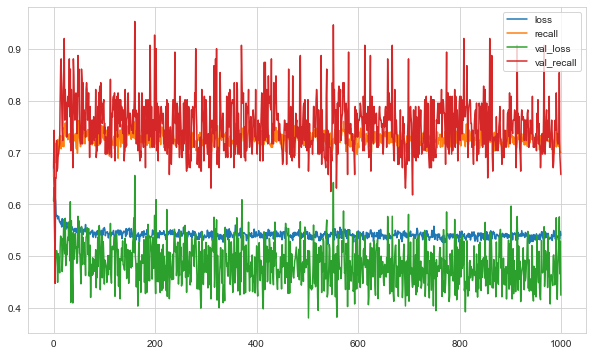

In [239]:
loss_df.plot()
plt.show()

In [240]:
Arwa_variable4 = model.evaluate(X_test, y_test, verbose=0)

In [241]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.4736664891242981
accuracy:  0.6953316926956177


In [242]:
y_train_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

250/250 [==============================] - 0s 1ms/step
[[5605  765]
 [ 552 1078]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      6370
           1       0.58      0.66      0.62      1630

    accuracy                           0.84      8000
   macro avg       0.75      0.77      0.76      8000
weighted avg       0.84      0.84      0.84      8000



In [243]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1340  253]
 [ 124  283]]
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1593
           1       0.53      0.70      0.60       407

    accuracy                           0.81      2000
   macro avg       0.72      0.77      0.74      2000
weighted avg       0.84      0.81      0.82      2000



In [244]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [245]:
y_train_pred = model.predict(X_train)

250/250 [==============================] - 0s 1ms/step


In [246]:
roc_auc_score(y_test, y_pred)

0.8612757595808443

In [247]:
def roc_auc_plot(y_train, pred_train, y_test, pred_test):
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train, pred_train)
    fpr_keras_test, tpr_keras_test, thresholds_keras_test = roc_curve(y_test, pred_test)


    auc_keras = auc(fpr_keras, tpr_keras)
    auc_keras_test = auc(fpr_keras_test, tpr_keras_test)


    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_keras, tpr_keras, label='train (area = {:.3f})'.format(auc_keras))
    plt.plot(fpr_keras_test, tpr_keras_test, label='val (area = {:.3f})'.format(auc_keras_test))

    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

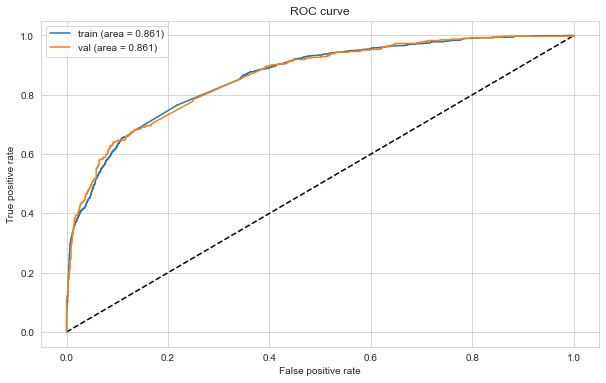

In [248]:
roc_auc_plot(y_train, y_train_pred,y_test, y_pred)

### Add Early Stop

#### Monitor the "val_loss" as metric

In [249]:
from tensorflow.keras.callbacks import EarlyStopping

In [251]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [252]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [253]:
model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=32,
    epochs=1000,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/1000
225/225 [==============================] - 2s 4ms/step - loss: 0.5267 - accuracy: 0.7819 - val_loss: 0.4555 - val_accuracy: 0.8100
Epoch 2/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4630 - accuracy: 0.7997 - val_loss: 0.4366 - val_accuracy: 0.8188
Epoch 3/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.4461 - accuracy: 0.8047 - val_loss: 0.4239 - val_accuracy: 0.8175
Epoch 4/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.4330 - accuracy: 0.8139 - val_loss: 0.4305 - val_accuracy: 0.8200
Epoch 5/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.4249 - accuracy: 0.8147 - val_loss: 0.4089 - val_accuracy: 0.8388
Epoch 6/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4157 - accuracy: 0.8222 - val_loss: 0.3913 - val_accuracy: 0.8388
Epoch 7/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.8283 - val_loss: 0.3752 - val_accuracy:

In [256]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3535800278186798
accuracy:  0.8554999828338623


In [257]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1482  111]
 [ 178  229]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1593
           1       0.67      0.56      0.61       407

    accuracy                           0.86      2000
   macro avg       0.78      0.75      0.76      2000
weighted avg       0.85      0.86      0.85      2000



In [258]:
from tensorflow.keras.optimizers import Adam

In [260]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [261]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [262]:
model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=32,
    epochs=1000,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.4780 - accuracy: 0.7924 - val_loss: 0.4344 - val_accuracy: 0.8288
Epoch 2/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.8213 - val_loss: 0.4019 - val_accuracy: 0.8375
Epoch 3/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8289 - val_loss: 0.3926 - val_accuracy: 0.8438
Epoch 4/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.4054 - accuracy: 0.8339 - val_loss: 0.3803 - val_accuracy: 0.8500
Epoch 5/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.3951 - accuracy: 0.8361 - val_loss: 0.3740 - val_accuracy: 0.8425
Epoch 6/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.3826 - accuracy: 0.8403 - val_loss: 0.3570 - val_accuracy: 0.8612
Epoch 7/1000
225/225 [==============================] - 0s 2ms/step - loss: 0.3646 - accuracy: 0.8525 - val_loss: 0.3292 - val_accuracy:

<AxesSubplot:>

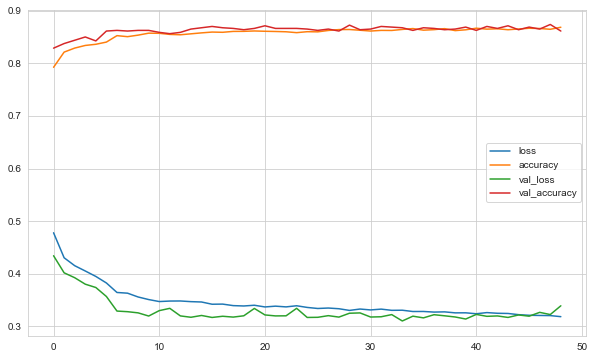

In [263]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [264]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.35140460729599
accuracy:  0.8550000190734863


In [265]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1510   83]
 [ 207  200]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.71      0.49      0.58       407

    accuracy                           0.85      2000
   macro avg       0.79      0.72      0.75      2000
weighted avg       0.84      0.85      0.84      2000



#### Monitor the "val_recall" as metric

## Optuna

In [272]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement optuna (from versions: none)
ERROR: No matching distribution found for optuna


In [276]:
 pip install optuna-dashboard


  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2


In [277]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [278]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [279]:
trial_metric = "accuracy"
batch_size = 64


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    tf.random.set_seed(42)
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [280]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-10-28 21:28:25,730] A new study created in memory with name: no-name-9a441131-30cb-4a5a-b8a4-454a278d8898
C:\Users\hp\anaconda3\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.optimizer_experimental.adam.Adam'> which is of type type.
  warnings.warn(message)
C:\Users\hp\anaconda3\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
C:\Users\hp\anaconda3\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.optimizer_

Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-28 21:28:39,087] Trial 0 finished with value: 0.796500027179718 and parameters: {'n_units1': 54, 'n_units2': 89, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>, 'learning_rate': 1.493754191313892e-05, 'w0': 0.029303456163731513, 'w1': 4.061148343127751}. Best is trial 0 with value: 0.796500027179718.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-28 21:28:48,666] Trial 1 finished with value: 0.6765000224113464 and parameters: {'n_units1': 26, 'n_units2': 13, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, 'learning_rate': 1.2389920022147987e-05, 'w0': 0.02698375341565464, 'w1': 1.230789307359513}. Best is trial 0 with value: 0.796500027179718.


Restoring model weights from the end of the best epoch: 13.
Epoch 28: early stopping


[I 2023-10-28 21:29:04,453] Trial 2 finished with value: 0.31850001215934753 and parameters: {'n_units1': 40, 'n_units2': 108, 'optimizer': <class 'keras.optimizers.optimizer_experimental.rmsprop.RMSprop'>, 'learning_rate': 0.01829456686845003, 'w0': 0.032650501393805695, 'w1': 2.9190424437104756}. Best is trial 0 with value: 0.796500027179718.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-28 21:29:13,632] Trial 3 finished with value: 0.20350000262260437 and parameters: {'n_units1': 35, 'n_units2': 121, 'optimizer': <class 'keras.optimizers.optimizer_experimental.rmsprop.RMSprop'>, 'learning_rate': 0.00019828862247871942, 'w0': 0.028533580962122086, 'w1': 2.9416015103792525}. Best is trial 0 with value: 0.796500027179718.


Restoring model weights from the end of the best epoch: 8.
Epoch 23: early stopping


[I 2023-10-28 21:29:25,909] Trial 4 finished with value: 0.796500027179718 and parameters: {'n_units1': 30, 'n_units2': 115, 'optimizer': <class 'keras.optimizers.optimizer_experimental.rmsprop.RMSprop'>, 'learning_rate': 2.5656942140010043e-05, 'w0': 1.6966063374778577, 'w1': 0.08954625982013897}. Best is trial 0 with value: 0.796500027179718.


Restoring model weights from the end of the best epoch: 35.
Epoch 50: early stopping


[I 2023-10-28 21:29:51,094] Trial 5 finished with value: 0.8535000085830688 and parameters: {'n_units1': 79, 'n_units2': 76, 'optimizer': <class 'keras.optimizers.optimizer_experimental.rmsprop.RMSprop'>, 'learning_rate': 0.0012598839916886041, 'w0': 0.13161275498977237, 'w1': 0.03419358307708933}. Best is trial 5 with value: 0.8535000085830688.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-28 21:30:01,243] Trial 6 finished with value: 0.796500027179718 and parameters: {'n_units1': 114, 'n_units2': 128, 'optimizer': <class 'keras.optimizers.optimizer_experimental.rmsprop.RMSprop'>, 'learning_rate': 0.00010674254591028455, 'w0': 3.806099883680588, 'w1': 0.36706572388258646}. Best is trial 5 with value: 0.8535000085830688.
[I 2023-10-28 21:30:48,558] Trial 7 finished with value: 0.7710000276565552 and parameters: {'n_units1': 11, 'n_units2': 93, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'>, 'learning_rate': 0.00011698901168857497, 'w0': 0.4653400592040033, 'w1': 0.011781371138374089}. Best is trial 5 with value: 0.8535000085830688.
[I 2023-10-28 21:31:37,303] Trial 8 finished with value: 0.8634999990463257 and parameters: {'n_units1': 38, 'n_units2': 81, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>, 'learning_rate': 0.0003207974130938496, 'w0': 0.7125294437986532, 'w1': 0.6391150436774317}. Best is

Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-28 21:31:51,575] Trial 9 finished with value: 0.5239999890327454 and parameters: {'n_units1': 91, 'n_units2': 83, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>, 'learning_rate': 1.4313945264234759e-05, 'w0': 0.048367965768622234, 'w1': 0.5606050397040676}. Best is trial 8 with value: 0.8634999990463257.


{'n_units1': 38,
 'n_units2': 81,
 'optimizer': keras.optimizers.optimizer_experimental.nadam.Nadam,
 'learning_rate': 0.0003207974130938496,
 'w0': 0.7125294437986532,
 'w1': 0.6391150436774317}

In [281]:
# build model with optuna parameters
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)
tf.random.set_seed(42)
model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    batch_size=512,
    epochs=100,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/100
15/15 [==============================] - 4s 44ms/step - loss: 0.5347 - recall: 0.0000e+00 - val_loss: 0.5057 - val_recall: 0.0000e+00
Epoch 2/100
15/15 [==============================] - 0s 11ms/step - loss: 0.5094 - recall: 0.0000e+00 - val_loss: 0.4861 - val_recall: 0.0000e+00
Epoch 3/100
15/15 [==============================] - 0s 11ms/step - loss: 0.4973 - recall: 0.0000e+00 - val_loss: 0.4780 - val_recall: 0.0000e+00
Epoch 4/100
15/15 [==============================] - 0s 12ms/step - loss: 0.4924 - recall: 0.0000e+00 - val_loss: 0.4734 - val_recall: 0.0000e+00
Epoch 5/100
15/15 [==============================] - 0s 12ms/step - loss: 0.4887 - recall: 0.0000e+00 - val_loss: 0.4700 - val_recall: 0.0000e+00
Epoch 6/100
15/15 [==============================] - 0s 11ms/step - loss: 0.4852 - recall: 0.0000e+00 - val_loss: 0.4671 - val_recall: 0.0000e+00
Epoch 7/100
15/15 [==============================] - 0s 11ms/step - loss: 0.4820 - recall: 0.0000e+00 - val_loss: 0.4640 - v

In [282]:
history = model.history.history

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [283]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1533   60]
 [ 225  182]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.75      0.45      0.56       407

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000



In [286]:
y_pred_proba = model.predict(X_test)
#RocCurveDisplay.from_predictions(y_test, y_pred_proba)

63/63 [==============================] - 0s 2ms/step


In [287]:
roc_auc_score(y_test, y_pred_proba)

0.8433271484118942

# Final Model and Model Deployment

In [290]:
import pickle

pickle.dump(MinMax_Scaler, open("scaler_cancer", "wb"))

<AxesSubplot:>

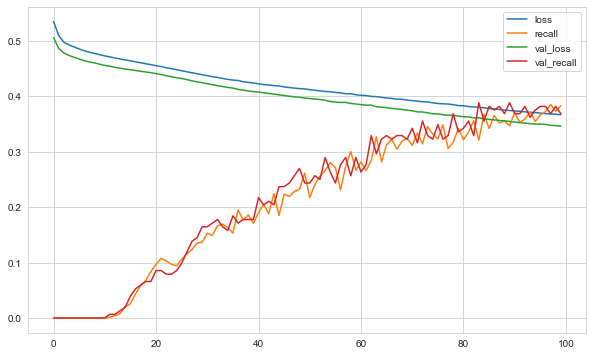

In [291]:
loss_df = pd.DataFrame(history)
loss_df.plot()

In [292]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.36276471614837646
recall:  0.44717445969581604


## Prediction

In [293]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1533   60]
 [ 225  182]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.75      0.45      0.56       407

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000



___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___